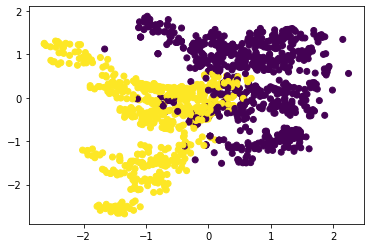

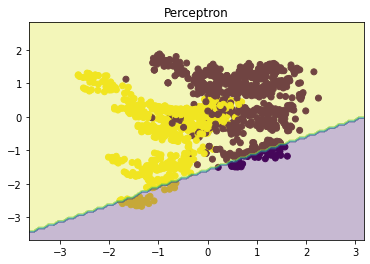

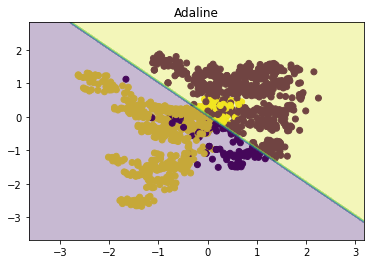

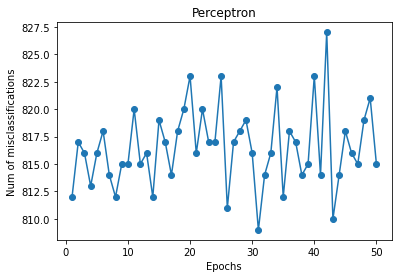

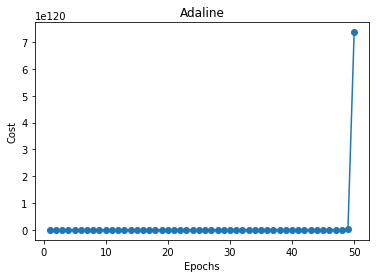

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#First, we load our dataset and shuffle it
data = pd.read_csv('data_banknote_authentication.csv')
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

#We assign the X to variance and skewness and Y to class
X = data[['variance', 'skewness']].values
y = data['class'].values

#We plot the scattered data
scaler = StandardScaler()
X = scaler.fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Creating our perceptron class
class Perceptron:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1] + 1)
        self.errors = []

        for _ in range(self.epochs):
            error = 0

            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w[1:] += update * xi
                self.w[0] += update
                error += int(update != 0.0)

            self.errors.append(error)

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#Plotting the perceptron
perceptron = Perceptron()
perceptron.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = perceptron.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title('Perceptron')
plt.show()

#Creating the Adaline class
class Adaline:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1] + 1)
        self.costs = []

        for _ in range(self.epochs):
            net_input = self.net_input(X)
            errors = y - net_input
            self.w[1:] += self.lr * X.T.dot(errors)
            self.w[0] += self.lr * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.costs.append(cost)

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#Plotting the adaline
adaline = Adaline(lr=0.01, epochs=50)
adaline.fit(X, y)
plt.scatter(X[:,0], X[:,1], c=y)
x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = adaline.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title('Adaline')
plt.show()


plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Num of misclassifications')
plt.title('Perceptron')
plt.show()

plt.plot(range(1, len(adaline.costs) + 1), adaline.costs, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Num of misclassifications')
plt.title('Adaline')
plt.show()



